---
# 1. Import Libraries
---

In [494]:
!pip install CatBoost

In [495]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import accuracy_score

import torch
import torch.nn as nn
import torch.optim as optim

from imblearn.over_sampling import SMOTE

---
# 2. Read Dataset
---

In [529]:
df = pd.read_csv('creditcard.csv')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


---
# 3. Exploratory Data Analysis
---

In [530]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [531]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [532]:
df.shape

(284807, 31)

In [533]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

- Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.
- The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.
- Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Class
0    284315
1       492
Name: count, dtype: int64


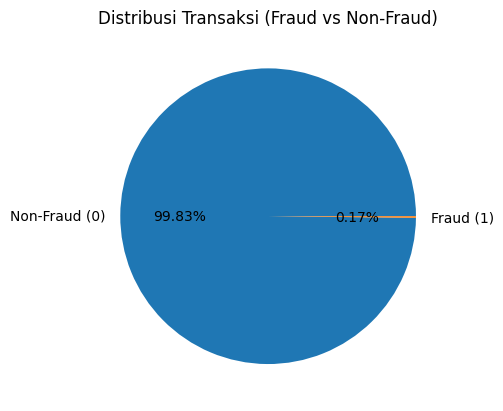

In [534]:
fraud_counts = df['Class'].value_counts()
print(fraud_counts)

plt.pie(
    fraud_counts,
    labels=['Non-Fraud (0)', 'Fraud (1)'],
    autopct='%1.2f%%',
)
plt.title("Distribusi Transaksi (Fraud vs Non-Fraud)")
plt.show()

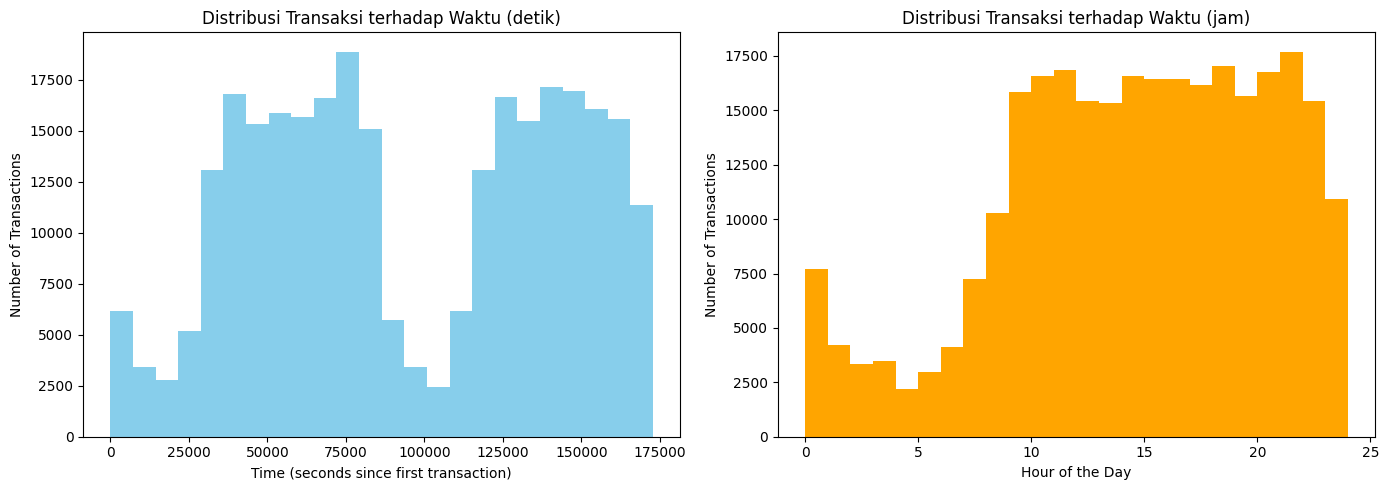

In [539]:
df['Hour'] = (df['Time'] / 3600) % 24

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))

ax1.hist(df['Time'], bins=24, color='skyblue')
ax1.set_xlabel("Time (seconds since first transaction)")
ax1.set_ylabel("Number of Transactions")
ax1.set_title("Distribusi Transaksi terhadap Waktu (detik)")

ax2.hist(df['Hour'], bins=24, color='orange')
ax2.set_xlabel("Hour of the Day")
ax2.set_ylabel("Number of Transactions")
ax2.set_title("Distribusi Transaksi terhadap Waktu (jam)")

plt.tight_layout()
plt.show()

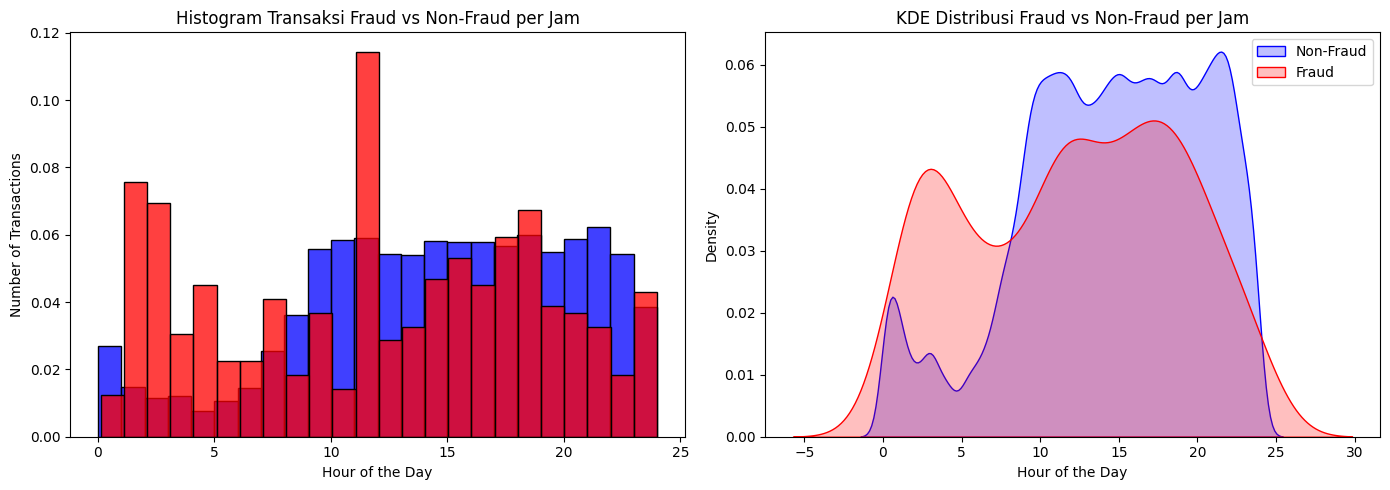

In [503]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))

sns.histplot(df[df['Class']==0]['Hour'], bins=24, color='blue', label='Non-Fraud', stat='density', ax=ax1)
sns.histplot(df[df['Class']==1]['Hour'], bins=24, color='red', label='Fraud', stat='density', ax=ax1)
ax1.set_title("Histogram Transaksi Fraud vs Non-Fraud per Jam")
ax1.set_xlabel("Hour of the Day")
ax1.set_ylabel("Number of Transactions")

sns.kdeplot(df[df['Class']==0]['Hour'], fill=True, color='blue', label='Non-Fraud', ax=ax2)
sns.kdeplot(df[df['Class']==1]['Hour'], fill=True, color='red', label='Fraud', ax=ax2)
ax2.set_title("KDE Distribusi Fraud vs Non-Fraud per Jam")
ax2.set_xlabel("Hour of the Day")
ax2.set_ylabel("Density")
ax2.legend()

plt.tight_layout()
plt.show()

---
# 4. Cleaning Data
---

In [504]:
# Check number of duplicates while ignoring the index feature
n_duplicates = df.duplicated().sum()
print(f"You seem to have {n_duplicates} duplicates in your database.")
df.shape

You seem to have 1081 duplicates in your database.


(284807, 32)

In [505]:
# Drop duplicates based on 'columns_to_consider'
df = df.drop_duplicates()

# Check number of duplicates while ignoring the index feature
n_duplicates = df.duplicated().sum()
print(f"You seem to have {n_duplicates} duplicates in your database.")
df.shape

You seem to have 0 duplicates in your database.


(283726, 32)

In [506]:
tab_null = df.isnull().sum()
n_null = df.isnull().sum().sum()
print(tab_null)
print(f"You seem to have {n_null} null in your database.")

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
Hour      0
dtype: int64
You seem to have 0 null in your database.


---
# 5. Check Correlation
---

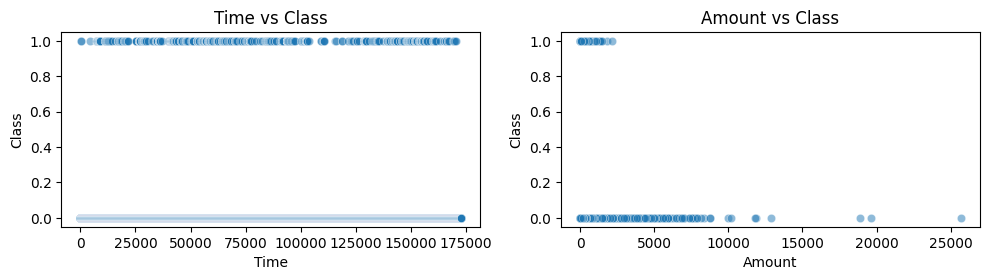

In [507]:
# Check the correlation X vs y
numeric_cols = ['Time', 'Amount']

plt.figure(figsize=(10, 5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=col, y='Class', data=df, alpha=0.5)
    plt.title(f"{col} vs Class")
    plt.xlabel(col)
    plt.ylabel("Class")

plt.tight_layout()
plt.show()

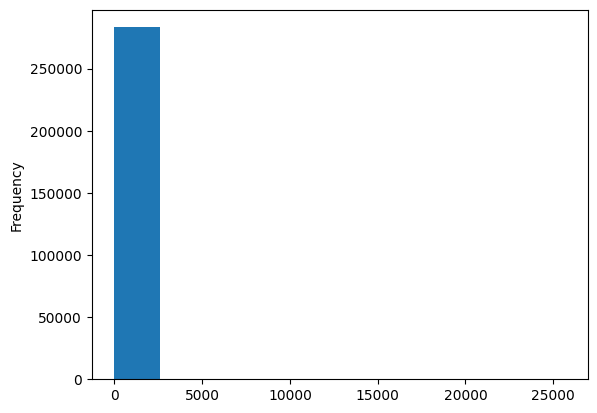

In [508]:
df['Amount'].plot.hist()
plt.show()

In [509]:
df['Amount'].max()

25691.16

In [510]:
df = df[df['Amount'] <= 9500]
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.000000
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.000000
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.000278
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.000278
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.000556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,23.996111
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,23.996389
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,23.996667
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,23.996667


In [511]:
df['Amount'].max()

8790.26

<Axes: >

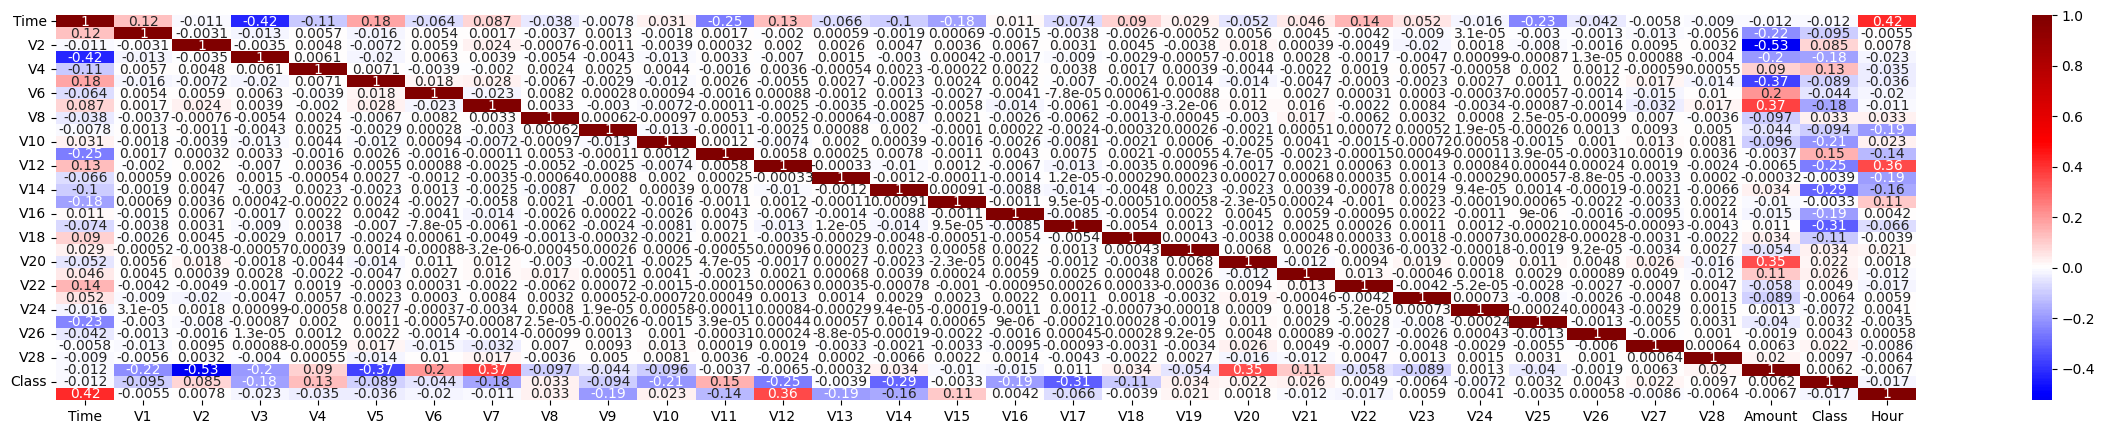

In [512]:
# Check the correlation heatmap
plt.figure(figsize=(30,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='seismic', center=0)

---
# 6. Preprocessing Data
---

In [513]:
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])
df['Time'] = scaler.fit_transform(df[['Time']])
df['Hour'] = scaler.fit_transform(df[['Hour']])

In [514]:
X = df.drop('Class', axis=1)
y = df['Class']

In [515]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [516]:
print(y_train.value_counts())

Class
0    226596
1       378
Name: count, dtype: int64


In [517]:
print(y_test.value_counts())

Class
0    56649
1       95
Name: count, dtype: int64


---
# 7. Train Model
---

### XGBoost

In [518]:
neg, pos = np.bincount(y_train)  # counts of 0 and 1
scale = neg / pos
print("scale_pos_weight =", scale)

scale_pos_weight = 599.4603174603175


In [519]:
xgb = XGBClassifier(
    tree_method="hist",
    device="cuda",         # or "cpu"
    scale_pos_weight=scale,
    n_estimators=300,
    max_depth=6,
    random_state=42
)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

In [520]:
y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56649
           1       0.93      0.85      0.89        95

    accuracy                           1.00     56744
   macro avg       0.97      0.93      0.94     56744
weighted avg       1.00      1.00      1.00     56744

ROC-AUC: 0.9808950963969263


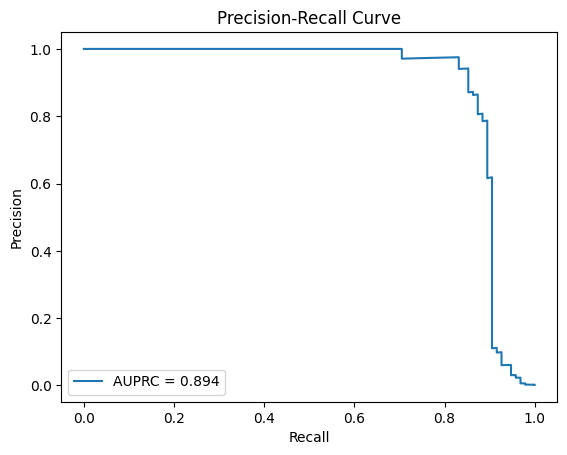

In [521]:
y_proba = xgb.predict_proba(X_test)[:,1]   # probability fraud

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
auprc = average_precision_score(y_test, y_proba)

plt.plot(recall, precision, label=f"AUPRC = {auprc:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

## Catboost

In [522]:
cat = CatBoostClassifier(
    iterations=500,
    loss_function='Logloss',
    eval_metric='AUC',
    random_state=42,
    verbose=100
)

In [523]:
cat.fit(X_train, y_train, eval_set=(X_test, y_test))

Learning rate set to 0.1636
0:	test: 0.9292208	best: 0.9292208 (0)	total: 69.8ms	remaining: 34.9s
100:	test: 0.9833495	best: 0.9839055 (93)	total: 7.55s	remaining: 29.8s
200:	test: 0.9839063	best: 0.9858781 (152)	total: 13.1s	remaining: 19.5s
300:	test: 0.9817311	best: 0.9858781 (152)	total: 20.1s	remaining: 13.3s
400:	test: 0.9812545	best: 0.9858781 (152)	total: 25.7s	remaining: 6.35s
499:	test: 0.9800258	best: 0.9858781 (152)	total: 32.6s	remaining: 0us

bestTest = 0.985878136
bestIteration = 152

Shrink model to first 153 iterations.


In [524]:
y_pred = cat.predict(X_test)
y_proba = cat.predict_proba(X_test)[:, 1]

In [525]:
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56649
           1       0.94      0.82      0.88        95

    accuracy                           1.00     56744
   macro avg       0.97      0.91      0.94     56744
weighted avg       1.00      1.00      1.00     56744

ROC-AUC: 0.9858781360009142


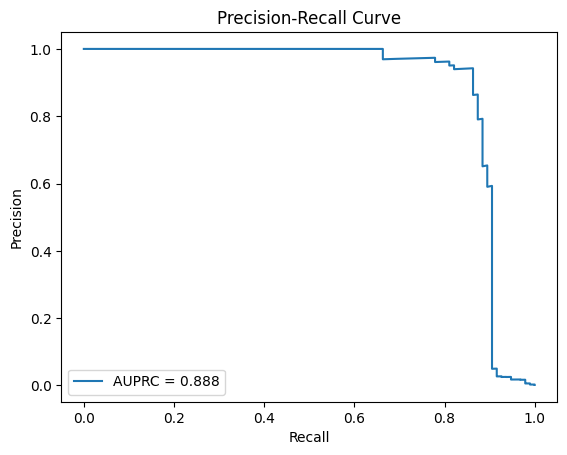

In [526]:
y_proba = cat.predict_proba(X_test)[:,1]   # probability fraud

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
auprc = average_precision_score(y_test, y_proba)

plt.plot(recall, precision, label=f"AUPRC = {auprc:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

---
# 8. Test on Full Dataset
---

In [527]:
X = df.drop('Class', axis=1)
y = df['Class']

y_pred = xgb.predict(X)

correct = (y_pred == y).sum()
incorrect = (y_pred != y).sum()

print("Total samples   :", len(y))
print("Correct preds   :", correct)
print("Incorrect preds :", incorrect)
print("Accuracy on full df:", accuracy_score(y, y_pred))

Total samples   : 283718
Correct preds   : 283698
Incorrect preds : 20
Accuracy on full df: 0.9999295074686837


In [528]:
cm = confusion_matrix(y, y_pred)
tn, fp, fn, tp = cm.ravel()

print("True Negatives :", tn)  # non-fraud predicted non-fraud
print("False Positives:", fp)  # non-fraud predicted fraud
print("False Negatives:", fn)  # fraud yang lolos
print("True Positives :", tp)  # fraud yang ketangkap

True Negatives : 283239
False Positives: 6
False Negatives: 14
True Positives : 459
